___
# Ciência dos Dados - PROJETO 1

## João Guilherme Coelho Apparecido - Turma B
___

#       Características do acesso a Tv e a Internet na Região Norte do País

O estudo a seguir pretende analisar o desenvolvimento da tecnologia na região urbana do Norte do Brasil, partindo de dois componentes que se tornam cada vez mais presentes nos domicílios brasileiros, a internet e a televisão. Através de tais resultados, busca-se compreender em quais unidades federativas se observam potênciais consumidores a fim de que empresas fornecedoras de tais serviços possam expandir o seu mercado para essa região, de modo a se adaptar à determinadas características dessa população, como a renda per capta e a demanda, por exemplo. 




___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
#exportando o dataset 2015
meu_diretorio = "/Users/joaog/Desktop/2semestre/CIENCIAS DOS DADOS/PNAD DOM2015/DOM2015csv"
os.chdir(meu_diretorio)
dados =pd.read_csv('DOM2015.csv',sep=',')

#Exportando o dataset 2014
PNAD2014 ='/Users/joaog/Desktop/2semestre/CIENCIAS DOS DADOS/PNAD DOM2014/DOM2014csv'
os.chdir(PNAD2014)
pnad = pd.read_csv('DOM2014.csv',sep=',')

#Exportando o dataset 2013
PNAD2013 ='/Users/joaog/Desktop/2semestre/CIENCIAS DOS DADOS/PNAD DOM2013/DOM2013csv'
os.chdir(PNAD2013)
pnad1 = pd.read_csv('DOM2013.csv',sep=',')

#NOMEAR AS COLUNAS
#Nomeando as colunas 2015
variavel=dados[(dados.UF<=17)& (dados.V0104<=4) & (dados.V4105<=4)]
coluna = variavel.iloc[:,[2,5,40,49,77,78]]
coluna.columns=['UF','Entrevista','TV','Internet','Renda','RENDA']


#Nomeando as colunas 2014

variavel1=pnad[(pnad.UF<=17) & (pnad.V0104<=4) & (pnad.V4105<=3)]
coluna1 = variavel1.iloc[:,[2,5,40,49,77,78]]
coluna1.columns=['UF','Entrevista','TV','Internet','Renda','RENDA']

#Nomeando as colunas 2013
variavel2=pnad1[(pnad1.UF<=17) & (pnad1.V0104<=4) & (pnad1.V4105<=3)]
coluna2 = variavel2.iloc[:,[2,5,40,49,77,78]]
coluna2.columns=['UF','Entrevista','TV','Internet','Renda','RENDA']

#nomeando as categorias 2015
coluna.RENDA = coluna.RENDA.astype('category')
coluna.RENDA.cat.categories = ('Sem rendimento','<0,25 SM','de 0,25 a 0,50 SM','de 0,5 a 1 SM','de 1 a 2 SM','de 2 a 3 SM','de 3 a 5 SM','Mais de 5 SM','S/ Declaração')
coluna.UF = coluna.UF.astype('category')
coluna.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO')
coluna.Entrevista = coluna.Entrevista.astype('category')
coluna.Entrevista.cat.categories = ('Realizada','Fechada','Recusada','Outra')
coluna.TV = coluna.TV.astype('category')
coluna.TV.cat.categories = ('Sim','Não','Não sabe')
coluna.Internet = coluna.Internet.astype('category')
coluna.Internet.cat.categories = ('Sim','Não')

tabela2015=[(coluna.RENDA != 'S/ Rendimento') & (coluna.RENDA != 'S/ Declaração')]
tabela2015=coluna.dropna()


#Nomeando as variaveis 2014
coluna1.RENDA = coluna1.UF.astype('category')
coluna1.UF = coluna1.UF.astype('category')
coluna1.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO')
coluna1.Entrevista = coluna1.Entrevista.astype('category')
coluna1.Entrevista.cat.categories = ('Realizada','Fechada','Recusada','Outra')
coluna1.TV = coluna1.TV.astype('category')
coluna1.TV.cat.categories = ('Sim','Não','Não sabe')
coluna1.Internet = coluna1.Internet.astype('category')
coluna1.Internet.cat.categories = ('Sim','Não')


tabela2014=coluna1.dropna()


#Nomeando as variaveis 2013
coluna2.UF = coluna2.UF.astype('category')
coluna2.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO')
coluna2.Entrevista = coluna2.Entrevista.astype('category')
coluna2.Entrevista.cat.categories = ('Realizada','Fechada','Recusada','Outra')
coluna2.TV = coluna2.TV.astype('category')
coluna2.TV.cat.categories = ('Sim','Não','Não sabe')
coluna2.Internet = coluna2.Internet.astype('category')
coluna2.Internet.cat.categories = ('Sim','Não')


tabela2013=coluna2.dropna()

#funcao para converter para porcentagem
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

#Unindo as tabelas dos 3 anos em uma só para a extração de informações
tabela2015['Ano']=2015
tabela2014['Ano']=2014
tabela2013['Ano']=2013

pd.options.mode.chained_assignment = None 



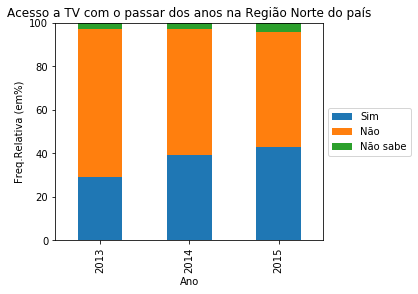

In [3]:
#crosstab entre os anos e o acesso a Tv
universal=pd.concat([tabela2015, tabela2014,tabela2013]) 
ct=pd.crosstab(universal.TV,universal.Ano,margins=True,rownames=['TV'], colnames=['Ano']).apply(percConvert, axis=0)
ct = ct.iloc[0:3,0:3]
plot = ct.T.plot(kind='bar', stacked=True,title='Acesso a TV com o passar dos anos na Região Norte do país')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#deixando a legenda fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Para iniciar uma análise mais detalhada acerca da região Norte, deve-se entender como se ocorreu a evolução do acesso a Tv nesses estados.Observando o gráfico acima compreende-se que o acesso a Tv vem crescendo consideravelmente nos últimos anos, apesar de a grande maioria da população ainda não possuir esse tipo de serviço. Esse contexto demonstra uma crescente na população com recursos suficientes para possuir uma Tv.Tal análise dá margem ao crescimento e proliferação de empresas privatizadas que buscam expandir e conquistar novos mercados na região Norte do Brasil, que vem apresentando uma demanda cada vez maior.


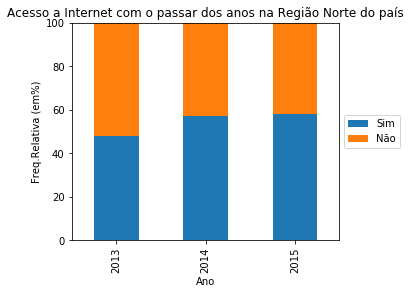

In [4]:
#crosstab entre os anos e o acesso a Internet
ct2=pd.crosstab(universal.Internet,universal.Ano,margins=True,rownames=['Internet'], colnames=['Ano']).apply(percConvert, axis=0)
ct2 = ct2.iloc[0:2,0:3]
plot = ct2.T.plot(kind='bar', stacked=True,title='Acesso a Internet com o passar dos anos na Região Norte do país')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#posicionando a legenda
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No gráfico acima, diferentemente do que acontece com a Tv, o acesso a internet quase não apresenta uma evolução de 2014 para 2015, apesar de a grande maioria da população já ter acesso à ela. Essa situação pode apresentar duas análises distintas, sendo que uma delas pode representar uma saturação na quantidade de domicilios que já possuem Internet, isto é, todos ou grande parte dos que tinham condições de tê-la, já a tem. Outra análise possível é a inexistência de novos pacotes e serviços que seduzam a população a contratá-las e agreguem aqueles que ainda não possuem. Nesta última, a empresa que queira aumentar a sua capacidade dentro da região Norte, deve buscar novos tipos de planos que sejam condizentes com a característica da população.

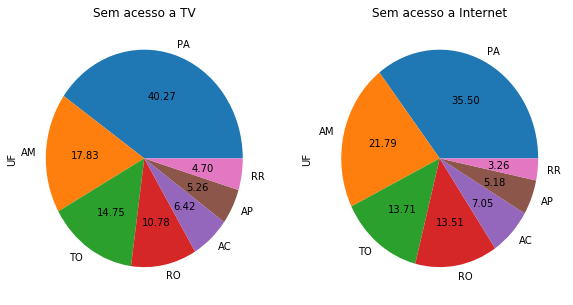

In [5]:

ct=pd.crosstab(tabela2015.UF, tabela2015.Internet)
ct.sum()
soma_tabela = ct.sum().sum()
dfc=ct*100/soma_tabela

#sem acesso a Tv- por estado
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
adim = tabela2015.UF[tabela2015.TV == 'Não'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sem acesso a TV')

#sem acesso a Internet- por estado
plt.subplot(132)
adim = tabela2015.UF[tabela2015.Internet == 'Não'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sem acesso a Internet')


Para se entender ainda melhor a forma com que esse tipo de tecnologia está distribuída na Região Norte, os gráficos acima expõem que a maioria dos domicilios que não possuem nem Tv,nem Internet estão concentradas no estado do Pará. Isso significa que em um primeiro momento, para uma empresa que queira levar o seu produto para essa região, seria interessante um intenso plano de markentig para uma possível massificação de seu produto no Pará, uma vez que é nesse estado a maior concentração de potenciais consumidores. Após um período de popularização de seus serviços nesse estado, o Amazonas e o Tocantins também seriam uma boa opção para que empresas fornecedoras de serviço de Tv e Internet  se fixem na região Norte do país.


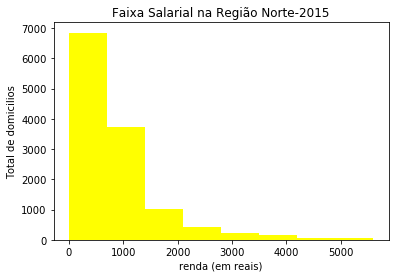

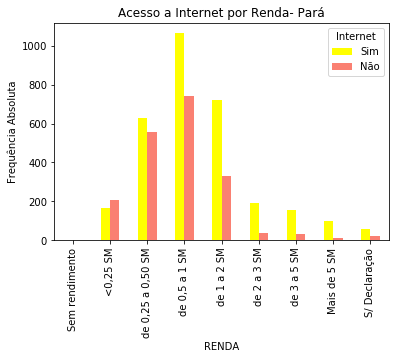

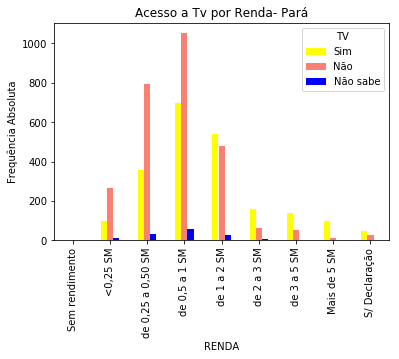

In [6]:
#SALÁRIOS(QUANTITATIVA-REGIÃO NORTE)
faixa = range(0,6000,700)
RENDA2015 = pd.cut(tabela2015.Renda, bins=faixa)
RENDA2015.value_counts(sort=False, normalize=True)*100
plot = tabela2015.Renda.plot.hist(bins=faixa,title='Faixa Salarial na Região Norte-2015',color='yellow')
plt.ylabel('Total de domicilios')
plt.xlabel('renda (em reais)')

#RENDA POR INTERNET(QUALITATIVA-PARÁ)
tabela=tabela2015[(tabela2015.UF=='PA')]
ct1 = pd.crosstab(tabela.RENDA,tabela.Internet)
plot= (ct1/ct1.sum().sum()).round(decimals=0)
ct1.plot(kind='bar',title='Acesso a Internet por Renda- Pará',color=('yellow', 'salmon'))
plt.ylabel('Frequência Absoluta')

#RENDA POR TV(QUALITATIVA-PARÁ)

tabela=tabela2015[(tabela2015.UF=='PA')]
ct1 = pd.crosstab(tabela.RENDA,tabela.TV)
plot= (ct1/ct1.sum().sum()).round(decimals=0)
ct1.plot(kind='bar',title='Acesso a Tv por Renda- Pará',color=('yellow', 'salmon','blue'))
plt.ylabel('Frequência Absoluta')

Para que empresas possam alcançar o seu público-alvo, é necessário conhecê-lo o melhor possível. Para aquelas que fornecem serviços de Tv e Internet é indispensável a análise de renda da população em questão. No caso da região Norte, percebe-se que grande contigente dos domicilios possuem uma faixa salarial menor que R$1.000,00. Isso mostra que para a empresa conseguir se fixar nessa região, é importante que ela adeque o seu serviço com planos básicos, porém suficientes para atender uma família com uma renda média de um salário minímo .
Esse cenário é semelhante ao do Pará, estado onde há uma maior demanda desses serviços, no qual grande parte da população que não possui nem Tv, nem Internet, possui uma renda de 0,5 a 1 salário minimo.Apesar de ser uma renda baixa, esse intervalo mostrou-se suficiente para se manter esse tipo de serviço uma vez que a maior parte das pessoas que possuem Tv e Internet estão situadas nesse intervalo. Essa constatação só corrobora o fato de que há uma massiva porção de consumidores  em potencial, basta as empresas adaptarem os planos de seus pordutos com os os ganhos mensais dessas famílias.


# Conclusão

Após uma análise mais aprofundada do desenvolvimento da Região Norte na questão de acesso a Tv e a Internet, percebe-se que uma grande parte dos domicilios ainda não possuem condições de ter acesso a esses serviços.Entretanto, notou-se que existe uma constante evolução do alcance dessas tecnologias na região, indicando que a população vem consumindo cada vez mais esses serviços. Partindo desse principio, cabe as empresas analisarem a melhor forma de vender os seus respectivos produtos, a fim de que tais artigos de tecnlogia se moldem a renda e a caracteristica dos cidadãos, garantindo tanto um aumento de receita para a empresa como uma expansão do acesso a Internet e a Tv na região Norte do País.